<br>
# ** 6 Predict the TimeSeries Data**
시계열 데이터 예측

<br><br>
## ** 3 prophet 모듈의 활용**

<br>
### ** 01 prophet 모델 만들기**

In [17]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

df         = stock.reset_index()
df         = df.filter(['Date', 'Close'] , axis=1)
df.columns = ['ds', 'y']
df['y']    = np.log(df['y'])

m = Prophet(yearly_seasonality = True)
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<br>
### ** 02 예측 데이터 생성하기**

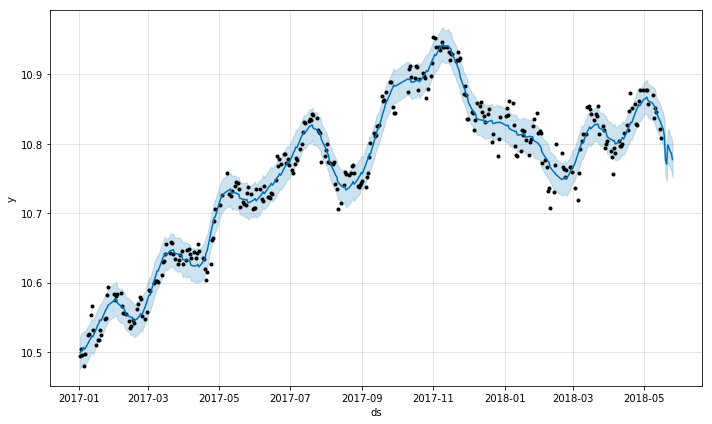

In [18]:
num_days = 10
future   = m.make_future_dataframe(periods = num_days)
forecast = m.predict(future)
plt      = m.plot(forecast)
plt.show()

In [19]:
stock.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,35980.0,36240.0,35880.0,36100.0,7816.854004,4650600
2017-01-03,36280.0,36620.0,36020.0,36480.0,7899.136719,7357650


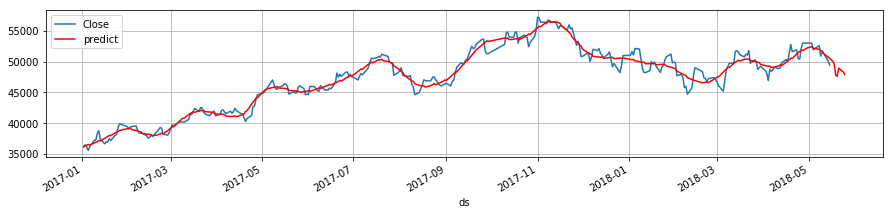

In [20]:
forecast['Close'] = round(np.exp(forecast.yhat), 2)

df_predict = forecast.filter(['ds', 'Close'])
df_predict = df_predict.set_index('ds')

stock.Close.plot(label='Close', figsize=(15,3), legend=True)
df_predict.Close.plot(label='predict', grid=True, color='red', legend=True)

<br>
### ** 03 결과 보고서 시각화**

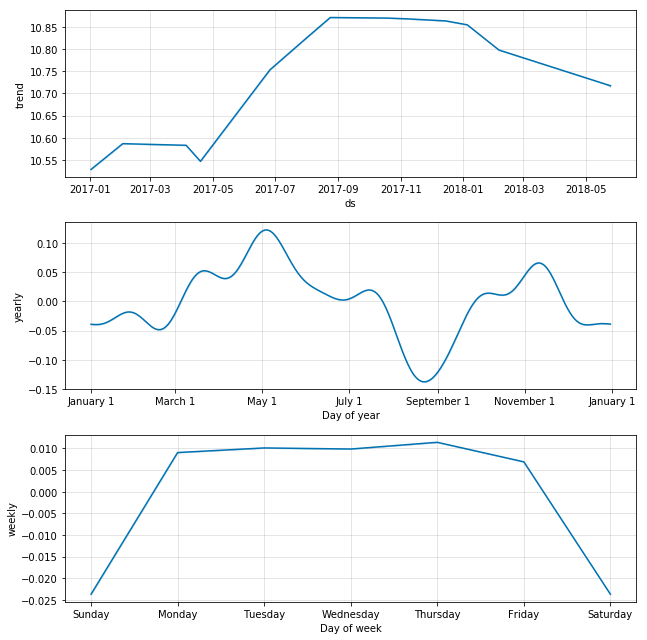

In [21]:
plt = m.plot_components(forecast)
plt.show()

<br><br>
## ** 4 Keras 를 활용한 주가예측**

<br>
### ** 01 데이터 전처리**

In [22]:
dataset = stock.reset_index()
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,35980.0,36240.0,35880.0,36100.0,7816.854004,4650600
1,2017-01-03,36280.0,36620.0,36020.0,36480.0,7899.136719,7357650


In [23]:
dataset = stock.reset_index()
del dataset['Date']
del dataset['Volume']
del dataset['Adj Close']
dataset.columns = ['Open','High','Low','Close']
dataset.tail(3)

,Open,High,Low,Close
329,52000.0,52200.0,51200.0,51300.0
330,51000.0,51100.0,49900.0,50100.0
331,50200.0,50400.0,49200.0,49450.0


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

Using TensorFlow backend.


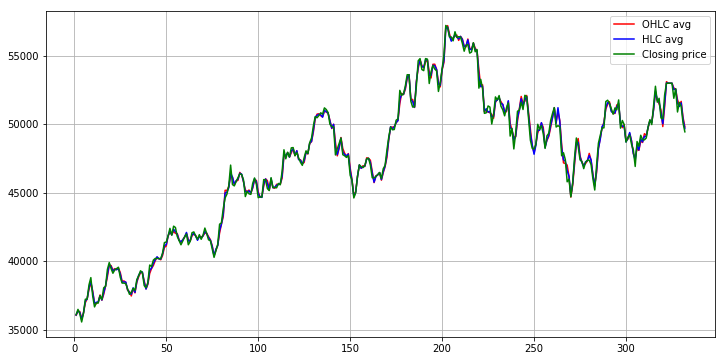

In [25]:
np.random.seed(7)  

obs       = np.arange(1, len(dataset) + 1, 1)
OHLC_avg  = dataset.mean(axis = 1)           
HLC_avg   = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]
plt.figure(figsize=(12,6))
plt.plot(obs, OHLC_avg,  'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg,   'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [26]:
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg), 1) )
print("일평균 데이터 : {},\n {}".format( OHLC_avg[:5], type(OHLC_avg)))

scaler   = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)  
print("정규화 데이터 : {}, {}".format(type(OHLC_avg), OHLC_avg[:5]) )

일평균 데이터 : [[36050.]
 [36350.]
 [36320.]
 [35805.]
 [36215.]],
 <class 'numpy.ndarray'>
정규화 데이터 : <class 'numpy.ndarray'>, [[0.01144592]
 [0.02546134]
 [0.0240598 ]
 [0.        ]
 [0.0191544 ]]


In [27]:
def new_dataset(dataset, step_size):
    import numpy as np 
    data_X, data_Y = [], []
    for i in range(len(dataset) - step_size - 1):
        data_X.append(dataset[i : (i+step_size), 0])  
        data_Y.append(dataset[i + step_size,     0])
    return np.array(data_X), np.array(data_Y)

train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC  = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY   = new_dataset(test_OHLC, 1)
print(trainX.shape, trainY.shape)  
print(trainX[1], trainY[1])

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX,  (testX.shape[0],  1, testX.shape[1]))
trainX.shape, testX

(247, 1) (247,)
[0.02546134] 0.024059799112356783


((247, 1, 1), array([[[0.56598925]],
 
        [[0.59588881]],
 
        [[0.63419762]],
 
        [[0.64821303]],
 
        [[0.66760103]],
 
        [[0.65288484]],
 
        [[0.58747956]],
 
        [[0.60803551]],
 
        [[0.62181733]],
 
        [[0.6514833 ]],
 
        [[0.68535389]],
 
        [[0.71922448]],
 
        [[0.67087129]],
 
        [[0.70590983]],
 
        [[0.67624387]],
 
        [[0.59518804]],
 
        [[0.53165148]],
 
        [[0.52908199]],
 
        [[0.52417659]],
 
        [[0.48469984]],
 
        [[0.41485634]],
 
        [[0.45503387]],
 
        [[0.52300864]],
 
        [[0.59448727]],
 
        [[0.61457603]],
 
        [[0.55594487]],
 
        [[0.53445457]],
 
        [[0.52347582]],
 
        [[0.52931558]],
 
        [[0.53819201]],
 
        [[0.56388694]],
 
        [[0.54099509]],
 
        [[0.49264191]],
 
        [[0.45596823]],
 
        [[0.49801448]],
 
        [[0.58070544]],
 
        [[0.61597758]],
 
        [[0.65101612]],
 

<br>
### ** 02 LSTM 모델 만들기**

In [28]:
step_size = 1
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='adam') 
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 6s - loss: 0.0857
Epoch 2/10
 - 2s - loss: 0.0080
Epoch 3/10
 - 2s - loss: 0.0017
Epoch 4/10
 - 2s - loss: 0.0014
Epoch 5/10
 - 2s - loss: 0.0014
Epoch 6/10
 - 2s - loss: 0.0015
Epoch 7/10
 - 2s - loss: 0.0013
Epoch 8/10
 - 2s - loss: 0.0011
Epoch 9/10
 - 2s - loss: 0.0012
Epoch 10/10
 - 2s - loss: 0.0011


In [29]:
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY       = scaler.inverse_transform([trainY])
testPredict  = scaler.inverse_transform(testPredict)
testY        = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore  = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train RMSE: {:.2f}\nTest  RMSE: {:.2f}'.format(trainScore, testScore))

Train RMSE: 683.65
Test  RMSE: 871.20


<br>
### ** 03 완성된 LSTM 모델의 예측결과 시각화**

In [30]:
trainPredictPlot          = np.empty_like(OHLC_avg)
trainPredictPlot[ : , : ] = np.nan
trainPredictPlot[step_size : len(trainPredict) + step_size , : ] = trainPredict

testPredictPlot       = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (step_size*2) + 1 : len(OHLC_avg) - 1 , : ] = testPredict

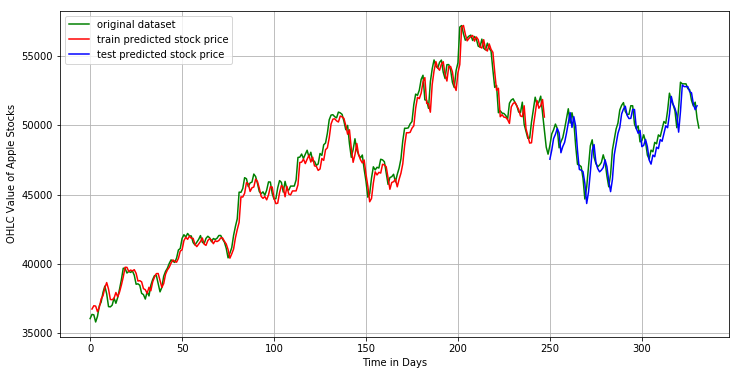

In [31]:
OHLC_avg = scaler.inverse_transform(OHLC_avg)

plt.figure(figsize=(12,6))
plt.plot(OHLC_avg,         'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'train predicted stock price')
plt.plot(testPredictPlot,  'b', label = 'test predicted stock price')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.legend(loc = 'upper left')
plt.grid(); plt.show()

<br>
### ** 04 완성된 LSTM 모델로 내일의 주가 예측**

In [32]:
last_val        = testPredict[-1:]
last_val_scaled = last_val / last_val
next_val        = model.predict(np.reshape(last_val_scaled, (1,1,1)))
last_price      = np.asscalar(last_val)
next_price      = np.asscalar(last_val * next_val)
print ("마지막 예측가격 : {} \n다음날 예측가격 : {} \n증감률 : {}".format(
        last_price, 
        next_price, 
        (next_price - last_val) / last_val) )

마지막 예측가격 : 51416.62109375 
다음날 예측가격 : 51428.6484375 
증감률 : [[0.00023392]]
